In [32]:
from qiskit.primitives import Sampler
from qiskit_algorithms.gradients import ParamShiftSamplerGradient
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
import numpy as np


From the number of locations visited find the qubits and longest binary string.

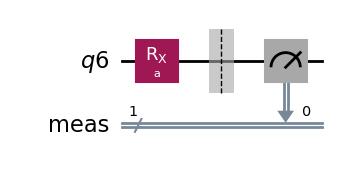

In [33]:
# Instantiate the quantum state with two parameters
a = Parameter('a')

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(a, q[0])
qc.measure_all() #important for sampler

qc.draw('mpl')


In [34]:

init_rots = [np.pi/2]
param_vals = [init_rots]
sampler = Sampler()
gradient = ParamShiftSamplerGradient(sampler)
pss_grad_result = gradient.run([qc], param_vals).result().gradients
#result = gradient.run([qc], param_vals).result().gradients
#print(result)

print('State estimator gradient computed with parameter shift', pss_grad_result)

State estimator gradient computed with parameter shift [[{1: np.float64(0.5), 0: np.float64(-0.5)}]]


C:\Users\DanielGoldsmith\AppData\Local\Temp\ipykernel_14100\2009997308.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


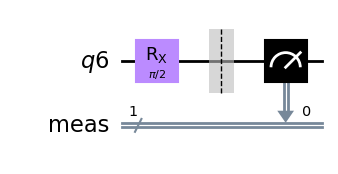

In [35]:
from quantum_functions import bind_weights, my_gradient
params = [Parameter('a')]
bc = bind_weights(params, init_rots, qc)
bc.draw("mpl", style="clifford")

In [36]:
def my_cost_function(bit_string_list):
    if bit_string_list == [0]:
        return 0 
    elif bit_string_list == [1]:
        return 1
    else:
        raise Exception('Invalid bit string list')

In [37]:
results = my_gradient(my_cost_function, qc, params, init_rots, np.pi/2)
print(results)

processing 0th weight
rot = 1.5707963267948966 i=0
New rots+ = [3.141592653589793]
New rots+ = [0.0]
cost+ = 1.0 cost- = 0.0, delta = 0.5
[0.5]
